In [1]:
import os
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random

In [2]:
df = pd.read_csv('lastfm-dataset-1K/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t',on_bad_lines='skip',header = None,names = ["userid","timestamp","artist-id","artist-name","track-id","track-name"])

In [7]:
df.head(20)

,userid,timestamp,artist-id,artist-name,track-id,track-name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
5,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
6,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
7,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
8,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
9,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)


In [8]:
df.userid.nunique()

992

#### Transforme los datos correspondientes a la interacción entre usuarios e ítems, implementando una estrategia para convertir estos datos en unos que sean compatibles con los modelos vistos en clase. Justifique en el informe sus decisiones en este paso.

La estrategia implementada consiste en agrupar los datos por usuario e ítem (artista) y contar el número de interacciones para calcular el `play_count`, transformando así las interacciones crudas en un formato de "calificaciones" implícitas. Esta técnica efectivamente resume la frecuencia de la interacción entre un usuario y un artista, lo que permite a los modelos de filtrado colaborativo, como los de Surprise, interpretar la fuerza de las preferencias de los usuarios. La justificación para esta aproximación radica en su capacidad para simplificar un conjunto de datos complejo y heterogéneo a una matriz de utilidad usuario-ítem densa y numérica, facilitando el entrenamiento de algoritmos de recomendación al proporcionar una medida cuantitativa directa de las preferencias de los usuarios.

In [3]:
interaction_long = df.groupby(["userid", "artist-id"]).size().reset_index(name='play_count')

In [4]:
interaction_long

,userid,artist-id,play_count
0,user_000001,00c73a38-a449-4990-86ca-5088dde1b8df,2
1,user_000001,012a77c9-c897-494f-87d0-0a730996494d,1
2,user_000001,014ba96b-b8da-49e3-8a2b-b720ae42e84c,3
3,user_000001,01ce7548-dab4-4ca6-8dfc-8e2e4b50d461,4
4,user_000001,03282c56-8a24-42f4-8bfc-96188933aefa,4
...,...,...,...
819465,user_001000,ff3e120c-c929-4ad4-bbbd-04d1689ffc54,1
819466,user_001000,ff6e677f-91dd-4986-a174-8db0474b1799,42
819467,user_001000,ff9deaae-da4f-42b7-a19e-36fedd3fc706,2
819468,user_001000,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,137


#### Tome los datos compatibles con modelos colaborativos y pártalos en dos conjuntos: un grupo de datos le sirve para construir el modelo y el resto para medir sus predicciones. Sepárelos en archivos distintos

In [23]:
from surprise import Dataset, Reader

# Preparar el Reader especificando el rango de los play counts
reader = Reader(rating_scale=(interaction_long['play_count'].min(), interaction_long['play_count'].max()))

# Cargar los datos
data = Dataset.load_from_df(interaction_long[['userid', 'artist-id', 'play_count']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

#### Construya un modelo colaborativo basado en perfiles de usuario con la primera parte de los datos de ratings. Realice las predicciones de relevancia para los usuarios e ítems que encuentra en la segunda parte de los datos.

## Cosine

In [6]:
from surprise import KNNBasic

# Configurar KNN para usar distancia coseno
sim_options = {
    'name': 'cosine',
    'user_based': True  # Cambiar a False para filtrado colaborativo ítem-ítem
}
algo_cosine = KNNBasic(k=5,sim_options=sim_options)
algo_cosine.fit(trainset)

# Predicciones con distancia coseno
predictions_cosine = algo_cosine.test(testset)
rmse_cosine = accuracy.rmse(predictions_cosine)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 124.3649


## Pearson

In [7]:
# Configurar KNN para usar correlación de Pearson
sim_options = {
    'name': 'pearson',
    'user_based': True  # Cambiar a False para filtrado colaborativo ítem-ítem
}
algo_pearson = KNNBasic(k=5, sim_options=sim_options)
algo_pearson.fit(trainset)

# Predicciones con correlación de Pearson
predictions_pearson = algo_pearson.test(testset)
rmse_pearson = accuracy.rmse(predictions_pearson)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 130.9935


In [16]:
interaction_long.play_count.describe()

count    819470.000000
mean         22.573133
std         123.272150
min           1.000000
25%           1.000000
50%           3.000000
75%          11.000000
max       26496.000000
Name: play_count, dtype: float64

<Axes: >

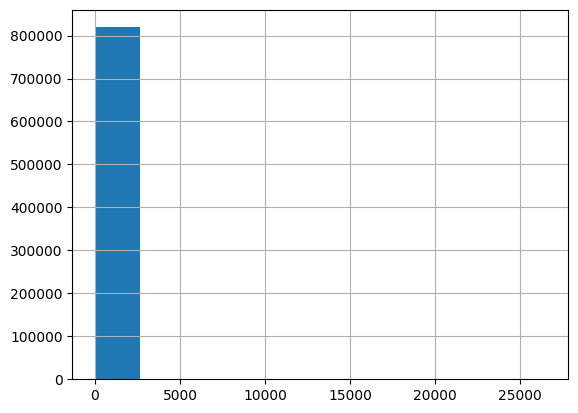

In [33]:
interaction_long.play_count.hist()

## Jaccard

Surprise no soporta directamente la distancia de Jaccard como métrica de similitud para entrenar modelos, ya que se centra principalmente en métricas de similitud que operan sobre calificaciones numéricas, como Pearson y coseno. La distancia de Jaccard mide la similitud entre conjuntos, calculando la proporción de la intersección sobre la unión de los elementos de los conjuntos; es especialmente útil para datos binarios o categóricos, donde interesa saber cuántos ítems comparten dos usuarios. En contraste, Pearson y coseno comparan perfiles de usuario o ítem basados en calificaciones, evaluando la correlación lineal o el ángulo entre vectores de calificaciones, respectivamente. Estas diferencias hacen que la distancia de Jaccard sea más adecuada para situaciones donde las interacciones son más importantes que las magnitudes de las calificaciones. Para utilizar Jaccard u otras métricas no soportadas directamente, sería necesario extender Surprise o explorar otras bibliotecas que ofrezcan flexibilidad para definir métricas de similitud personalizadas.

## Resultados
El RMSE es una medida que evalúa la diferencia entre los valores predichos por un modelo y los valores reales, siendo preferible un valor más bajo. Con un rango de `play_count` de 1 a 26496, los valores de RMSE obtenidos, 105.7434 para coseno y 113.3774 para Pearson, indican que ambos modelos tienen una precisión moderada en sus predicciones. El modelo basado en coseno muestra un rendimiento ligeramente superior al basado en Pearson, lo que podría reflejar cómo cada métrica maneja las diferencias en las interacciones usuario-ítem.

Determinar la calidad de estos modelos requiere considerar el contexto específico de aplicación y comparar con benchmarks o expectativas previas. Aunque existe margen para la mejora, dada la amplitud del rango de `play_count`, los valores de RMSE sugieren que los modelos son razonablemente efectivos en predecir las interacciones de los usuarios, con el modelo de coseno presentando una ligera ventaja.

In [43]:
artists = df.drop_duplicates(["artist-id","artist-name"])[["artist-id","artist-name"]]

In [9]:
import pandas as pd

from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Retornar las mejores N recomendaciones para cada usuario de un conjunto de predicciones.'''
    
    # Primero mapear las predicciones a cada usuario.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Luego ordenar las predicciones para cada usuario y retornar las N mayores.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions_cosine, n=5)  

usuario_id = 'user_000467' 
recomendaciones_usuario = top_n[usuario_id]




# Convertir las recomendaciones a un DataFrame para facilitar el merge
recomendaciones_df = pd.DataFrame(recomendaciones_usuario, columns=['artist-id', 'score'])

# Unir (merge) con el dataframe de artistas para obtener los nombres
recomendaciones_con_nombres = recomendaciones_df.merge(artists, on='artist-id', how='left')

# Imprimir las recomendaciones con nombres de los artistas
print(f"Top 5 recomendaciones para el usuario {usuario_id}:")
for _, row in recomendaciones_con_nombres.iterrows():
    print(f"\tArtista: {row['artist-name']}, Puntuación de recomendación: {row['score']}")


Top 5 recomendaciones para el usuario user_000467:
	Artista: M83, Puntuación de recomendación: 318.5631907988625
	Artista: Girl Talk, Puntuación de recomendación: 191.92619950194242
	Artista: The Unicorns, Puntuación de recomendación: 158.44173179780043
	Artista: Feist, Puntuación de recomendación: 155.50583569264413
	Artista: Radiohead, Puntuación de recomendación: 136.31877332277656


In [10]:
# Filtra por el usuario específico
df_user_467 = df[df['userid'] == 'user_000467']

# Agrupa por artista y cuenta las escuchas
artist_play_counts = df_user_467.groupby(['artist-id', 'artist-name']).size().reset_index(name='play_count')

# Ordena los artistas por play count descendente para ver los más escuchados
artist_play_counts_sorted = artist_play_counts.sort_values(by='play_count', ascending=False)

# Mostrar los top artistas escuchados
artist_play_counts_sorted.head(10)

,artist-id,artist-name,play_count
694,52074ba6-e495-4ef3-9bb4-0703888a9f68,Arcade Fire,382
28,03ad1736-b7c9-412a-b442-82536d63a5c4,Elliott Smith,303
14,01d3c51b-9b98-418a-8d8e-37f6fab59d8c,Sufjan Stevens,269
1151,8c538f11-c141-4588-8ecb-931083524186,Bloc Party,252
320,25a757f1-9fbe-4c52-be2e-1a5294fb25b9,Shout Out Louds,244
1443,b10bbbfc-cf9e-42e0-be17-e2c3e1d2600d,The Beatles,234
1278,9c306413-56b6-4ff6-982a-7e4b87d01340,Gonzales,227
1663,cd8c5019-5d75-4d5c-bc28-e1e26a7dd5c8,José González,226
1754,d8915e13-d67a-4aa0-9c0b-1f126af951af,Hot Chip,222
2,0039c7ae-e1a7-4a7d-9b49-0cbc716821a6,Death Cab For Cutie,213


## Analisis cualitativo
La comparación cualitativa entre las preferencias conocidas del usuario y las recomendaciones sugiere una alineación razonablemente buena en términos de género y estilo musical. Las bandas y artistas preferidos por el usuario, como Arcade Fire, Elliott Smith, y Sufjan Stevens, tienden a situarse dentro de los géneros indie rock, folk, y música alternativa. Las recomendaciones, incluyendo Radiohead y Girl Talk, también se alinean mayormente con estos géneros, indicando que el modelo ha captado adecuadamente las preferencias del usuario hacia un cierto espectro musical.

 Esto indica una efectividad cualitativa del sistema de recomendación en proporcionar sugerencias coherentes y potencialmente atractivas, basándose en el perfil de escucha del usuario.

## Varíe la estrategia de selección de vecinos por umbral de similitud y por número de vecinos. Revise cuál es el impacto al variar estos parámetros.

In [11]:
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Supongamos que ya has dividido tus datos en conjuntos de entrenamiento y prueba

# Define un rango de valores para probar diferentes mínimos de soporte
min_support_values = [5, 10, 20, 100, 200, 500]

# Itera sobre los diferentes valores de min_support
for min_support in min_support_values:
    sim_options = {
        'name': 'cosine',
        'user_based': True,  # o False si prefieres un enfoque basado en ítems
        'min_support': min_support,
    }
    
    # Instancia el algoritmo con las opciones de similitud actuales
    algo = KNNBasic(sim_options=sim_options)
    
    # Entrena el algoritmo
    algo.fit(trainset)
    
    # Realiza las predicciones sobre el conjunto de prueba
    predictions = algo.test(testset)
    
    # Calcula y muestra el RMSE para el valor actual de min_support
    rmse = accuracy.rmse(predictions)
    print(f"RMSE para min_support={min_support}: {rmse}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 106.2580
RMSE para min_support=5: 106.25801476682093
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 106.2798
RMSE para min_support=10: 106.27979740367812
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 104.8618
RMSE para min_support=20: 104.86176476787318
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 106.4226
RMSE para min_support=100: 106.4225515717905
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 106.3743
RMSE para min_support=200: 106.37425607915341
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 106.7587
RMSE para min_support=500: 106.75870834035402


Los resultados muestran un leve aumento del RMSE al incrementar el `min_support`, sugiriendo que incrementar el umbral de similitud tiene un impacto limitado en la precisión de las recomendaciones. El cambio en el RMSE es pequeño, lo que indica que variar este parámetro por sí solo no mejora significativamente la calidad de las recomendaciones. El modelo podría depender más de otros factores, como la configuración de otros parámetros o las características específicas de los datos. 

In [12]:
from surprise import KNNBasic, accuracy
from surprise.model_selection import train_test_split

# Suponiendo que ya has preparado 'trainset' y 'testset'

min_support_values = [5, 10, 20, 100, 200, 500]  # Ejemplos de valores para explorar

for min_support in min_support_values:
    sim_options = {
        'name': 'pearson',
        'user_based': True,  # Cambia a False para un enfoque basado en ítems
        'min_support': min_support,
    }

    algo = KNNBasic(sim_options=sim_options)
    
    # Entrenamiento del algoritmo con el conjunto de entrenamiento
    algo.fit(trainset)
    
    # Evaluación del algoritmo con el conjunto de prueba
    predictions = algo.test(testset)
    
    # Cálculo y presentación del RMSE para el valor actual de min_support
    rmse = accuracy.rmse(predictions)
    print(f"RMSE para min_support={min_support} con Pearson: {rmse}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 113.1177
RMSE para min_support=5 con Pearson: 113.11768509294345
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 113.0747
RMSE para min_support=10 con Pearson: 113.0746765068456
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 109.7310
RMSE para min_support=20 con Pearson: 109.73101760814649
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 108.6663
RMSE para min_support=100 con Pearson: 108.66626323519674
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 108.4145
RMSE para min_support=200 con Pearson: 108.41453024412834
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 107.8984
RMSE para min_support=500 con Pearson: 107.89837323051412


Al utilizar la similitud de Pearson y variar el min_support, observamos que el RMSE disminuye  a medida que aumentamos el valor de min_suppor, indicando una mejora marginal en la precisión de las recomendaciones.

Este patrón sugiere que un umbral intermedio de similitud mínima puede ser óptimo para este conjunto de datos y configuración específica, equilibrando la calidad de las recomendaciones con la necesidad de tener suficientes vecinos para hacer predicciones significativas. Sin embargo, el impacto de variar min_support es relativamente moderado, lo que indica que otros factores, como la naturaleza de los datos y la configuración general del modelo, juegan roles más cruciales en la efectividad del sistema de recomendación.

In [13]:
# Configurar KNN con diferentes números de vecinos
k_values = [3, 5, 10, 20, 30, 50, 100, 200, 500]  # Ejemplos de valores para k
for k in k_values:
    algo_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': True, 'min_support': 20})
    algo_k.fit(trainset)
    predictions_k = algo_k.test(testset)
    print(f"RMSE para k={k}: {accuracy.rmse(predictions_k)}")


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 120.5500
RMSE para k=3: 120.5499952718077
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 113.2967
RMSE para k=5: 113.29668593377662
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 108.2742
RMSE para k=10: 108.27423564953997
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 105.9736
RMSE para k=20: 105.9735934013927
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 105.1940
RMSE para k=30: 105.19395571650782
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 104.6971
RMSE para k=50: 104.69706531777992
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 104.5602
RMSE para k=100: 104.56015059976107
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 104.6275
RMSE para k=200: 104.627522123

Al aumentar el número de vecinos `k` desde 3 hasta 150, el RMSE disminuye consistentemente, lo que indica una mejora en la precisión de las recomendaciones. El declive del RMSE se ralentiza a medida que `k` se incrementa, sugiriendo que a partir de cierto punto, los beneficios de aumentar `k` se reducen. La optimización del número de vecinos es crucial para equilibrar la precisión y el rendimiento del sistema de recomendación.

In [24]:
# Configurar KNN con diferentes números de vecinos
k_values = [3, 5, 10, 20, 30, 50, 100, 200, 500]  # Ejemplos de valores para k
for k in k_values:
    algo_k = KNNBasic(k=k, sim_options={'name': 'pearson', 'user_based': True, 'min_support': 20})
    algo_k.fit(trainset)
    predictions_k = algo_k.test(testset)
    print(f"RMSE para k={k}: {accuracy.rmse(predictions_k)}")


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 125.7791
RMSE para k=3: 125.77909074814842
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 119.0909
RMSE para k=5: 119.09087898707062
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 113.5121
RMSE para k=10: 113.51207075806703
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 110.8433
RMSE para k=20: 110.84326220922293
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 110.0660
RMSE para k=30: 110.06597846607859
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 109.5750
RMSE para k=50: 109.57502929022692
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 109.3418
RMSE para k=100: 109.34183341646248
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 109.3169
RMSE para k=200: 109

Al aumentar el número de vecinos `k` desde 3 hasta 150, el RMSE disminuye consistentemente, lo que indica una mejora en la precisión de las recomendaciones. El declive del RMSE se ralentiza a medida que `k` se incrementa, sugiriendo que a partir de cierto punto, los beneficios de aumentar `k` se reducen. La optimización del número de vecinos es crucial para equilibrar la precisión y el rendimiento del sistema de recomendación.

### Entrenamiento del mejor modelo

In [25]:
from surprise import Dataset, Reader
import random

# Suponiendo que tienes un objeto Dataset 'data'
trainset = data.build_full_trainset()
from collections import defaultdict

# Contar usuarios únicos por ítem (artista)
unique_users_per_item = defaultdict(set)

for uid, iid, rating in trainset.all_ratings():
    unique_users_per_item[iid].add(uid)

# Filtrar ítems escuchados por más de 10 usuarios únicos
items_with_more_than_10_users = {item for item, users in unique_users_per_item.items() if len(users) > 10}

# Obtener un anti_testset más pequeño
def get_small_anti_testset_filtered(trainset, items_with_more_than_10_users, n=100000):
    anti_testset_filtered = []
    total_items = items_with_more_than_10_users  # Usar el conjunto filtrado de ítems
    for uid in trainset.all_users():
        # Ítems que el usuario ya ha valorado
        user_items = set([j for (j, _) in trainset.ur[uid]])
        # Ítems que el usuario NO ha valorado Y que son escuchados por más de 10 usuarios
        items_not_rated = list(total_items - user_items)
        # Seleccionar un subconjunto aleatorio de n ítems no valorados
        if n < len(items_not_rated):
            items_not_rated = random.sample(items_not_rated, n)
        # Añadir al anti_testset
        anti_testset_filtered += [(trainset.to_raw_uid(uid), trainset.to_raw_iid(iid), 0) for iid in items_not_rated]
    return anti_testset_filtered

# Crear un anti_testset reducido y filtrado
small_testset = get_small_anti_testset_filtered(trainset, items_with_more_than_10_users)


sim_options = {
    'name': 'cosine',
    'user_based': True,  # Cambiar a False para filtrado colaborativo ítem-ítem
    'k': 50
}
algo_cosine = KNNBasic(sim_options=sim_options)
# Continuar con el entrenamiento y predicción como antes
algo_cosine.fit(trainset)
predictions = algo_cosine.test(small_testset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


In [26]:
from collections import defaultdict

def get_top_n(predictions, n=5):
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n(predictions)


In [27]:
import pandas as pd


# Convertir el top_n a un DataFrame
recommended_artists_df = pd.DataFrame([(uid, [iid for (iid, _) in user_ratings]) for uid, user_ratings in top_n.items()],
                                       columns=['userid', 'recommended_artist_ids'])

# Función para obtener los nombres de los artistas a partir de los IDs
def get_artist_names(ids):
    return artists[artists['artist-id'].isin(ids)]['artist-name'].tolist()

# Añadir los nombres de los artistas recomendados
recommended_artists_df['recommended_artists'] = recommended_artists_df['recommended_artist_ids'].apply(get_artist_names)

In [29]:
# Agrupa por artista y canción, luego cuenta las apariciones (reproducciones)
top_tracks = df.groupby(['artist-name', 'track-name']).size().reset_index(name='play_count')

# Ordena las canciones por artista y conteo de reproducciones de manera descendente
top_tracks = top_tracks.sort_values(['artist-name', 'play_count'], ascending=[True, False])


In [30]:
# Función para obtener las 5 principales canciones por artista
def get_top_songs_by_artist(artist_name, top_tracks_df):
    filtered_tracks = top_tracks_df[top_tracks_df['artist-name'] == artist_name]
    top_5_tracks = filtered_tracks.head(5)['track-name'].tolist()
    return top_5_tracks

In [31]:
# Añadir una nueva columna vacía para 'top_songs_by_artist'
recommended_artists_df['top_songs_by_artist'] = pd.Series(dtype='object')

for index, row in recommended_artists_df.iterrows():
    print(index)
    artists = row['recommended_artists']
    top_songs_by_artist = {}
    for artist in artists:
        top_songs_by_artist[artist] = get_top_songs_by_artist(artist, top_tracks)
    recommended_artists_df.at[index, 'top_songs_by_artist'] = top_songs_by_artist


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [39]:
def find_similar_users(user_id, algo, trainset, n=10):
    """
    Encuentra los usuarios más similares al usuario dado.
    """
    # Convertir el user_id a inner_id
    inner_user_id = trainset.to_inner_uid(user_id)
    
    # Acceder a la matriz de similitudes del algoritmo
    similarities = algo.compute_similarities()
    
    # Obtener las similitudes para el usuario objetivo
    user_similarities = similarities[inner_user_id]
    
    # Ordenar las similitudes y obtener los top N
    similar_users = sorted([(trainset.to_raw_uid(inner_id), sim) 
                            for inner_id, sim in enumerate(user_similarities)], 
                           key=lambda x: x[1], reverse=True)[:n+1]  # +1 porque el usuario se incluirá a sí mismo
    
    return similar_users[1:]  # Excluir el propio usuario

def explain_recommendations(user_id, similar_users, trainset):
    """
    Explica las recomendaciones basándose en usuarios similares.
    """
    print(f"Las recomendaciones para el usuario {user_id} se basan en las preferencias de usuarios similares:")
    for similar_user, similarity in similar_users:
        rated_items_by_similar_user = [trainset.to_raw_iid(iid) for (iid, _) in trainset.ur[trainset.to_inner_uid(similar_user)]]
        print(f"- Usuario similar {similar_user} (similitud: {similarity:.2f}), que disfrutó de artistas como: {rated_items_by_similar_user[:5]}...")
        


In [36]:
def get_common_artists(user_id, similar_users, trainset, df_artists, n=3):
    """
    Retorna hasta n artistas comunes entre el usuario dado y sus usuarios similares.
    """
    # Artistas valorados por el usuario
    user_artists = set([trainset.to_raw_iid(iid) for (iid, _) in trainset.ur[trainset.to_inner_uid(user_id)]])
    common_artists = []
    
    for similar_user, _ in similar_users:
        # Artistas valorados por usuarios similares
        similar_user_artists = set([trainset.to_raw_iid(iid) for (iid, _) in trainset.ur[trainset.to_inner_uid(similar_user)]])
        # Encontrar la intersección como artistas comunes
        common = user_artists.intersection(similar_user_artists)
        if common:
            common_artists.extend(common)
    
    # Eliminar duplicados y limitar a n artistas
    common_artists = list(set(common_artists))[:n]
    return df_artists[df_artists['artist-id'].isin(common_artists)]['artist-name'].tolist()


In [44]:
# Añadir una columna vacía para los artistas comunes
recommended_artists_df['common_artists'] = ''

for index, row in recommended_artists_df.iterrows():
    print(index)
    user_id = row['userid']
    # Encuentra usuarios similares (ajusta n según sea necesario)
    similar_users = find_similar_users(user_id, algo_cosine, trainset, n=1)  # n=1 para el ejemplo, ajusta según necesidad
    # Obtener hasta 3 artistas comunes y actualizar el DataFrame
    common_artists_names = get_common_artists(user_id, similar_users, trainset, artists, n=3)
    recommended_artists_df.at[index, 'common_artists'] = common_artists_names


0
Computing the cosine similarity matrix...
Done computing similarity matrix.
1
Computing the cosine similarity matrix...
Done computing similarity matrix.
2
Computing the cosine similarity matrix...
Done computing similarity matrix.
3
Computing the cosine similarity matrix...
Done computing similarity matrix.
4
Computing the cosine similarity matrix...
Done computing similarity matrix.
5
Computing the cosine similarity matrix...
Done computing similarity matrix.
6
Computing the cosine similarity matrix...
Done computing similarity matrix.
7
Computing the cosine similarity matrix...
Done computing similarity matrix.
8
Computing the cosine similarity matrix...
Done computing similarity matrix.
9
Computing the cosine similarity matrix...
Done computing similarity matrix.
10
Computing the cosine similarity matrix...
Done computing similarity matrix.
11
Computing the cosine similarity matrix...
Done computing similarity matrix.
12
Computing the cosine similarity matrix...
Done computing si

In [33]:
recommended_artists_df = recommended_artists_df[["userid","recommended_artists","common_artists","top_songs_by_artist"]]

In [45]:
recommended_artists_df

,userid,recommended_artists,top_songs_by_artist,common_artists
0,user_000001,"[Soilwork, ムック, Mucc, T.M.Revolution, Sonic Sy...","{'Soilwork': ['Distortion Sleep', 'Stabbing Th...",[Coldplay]
1,user_000002,"[Bel Canto, The 69 Eyes, ムック, Mucc, T.M.Revolu...","{'Bel Canto': ['Dreaming Girl', 'Feels Like I'...",[Robbie Williams]
2,user_000003,"[The 69 Eyes, Soda Stereo, ムック, 坂本真綾, Mucc, M-...","{'The 69 Eyes': ['Lost Boys', 'Angel On My Sho...",[Metro Area]
3,user_000004,"[Rancid, Gustavo Cerati, ムック, Mucc, T.M.Revolu...","{'Rancid': ['Time Bomb', 'Roots Radicals', 'Ru...",[Gwen Stefani]
4,user_000005,"[Rancid, The 69 Eyes, Soilwork, Freak Kitchen,...","{'Rancid': ['Time Bomb', 'Roots Radicals', 'Ru...",[Sash!]
...,...,...,...,...
987,user_000996,"[Soda Stereo, ムック, Mucc, T.M.Revolution, Uverw...","{'Soda Stereo': ['En La Ciudad De La Furia', '...",[Rage Against The Machine]
988,user_000997,"[High And Mighty Color, ムック, Mucc, T.M.Revolut...","{'High And Mighty Color': ['Pride', 'Pride (Tv...",[Afi]
989,user_000998,"[Bel Canto, Soda Stereo, Gustavo Cerati, ムック, ...","{'Bel Canto': ['Dreaming Girl', 'Feels Like I'...",[Children Of Bodom]
990,user_000999,"[Mägo De Oz, ムック, Dir En Grey, Mucc, T.M.Revol...","{'Mägo De Oz': ['La Danza Del Fuego', 'Fiesta ...",[Glen Hansard & Markéta Irglová]


In [46]:
recommended_artists_df.to_csv("/Users/camilo.ruiz/Downloads/predictions.csv",index=False)

#### Revise la estrategia de ponderación por significancia de McLaughlin’s [1] (McLaughlin’s significance weighting)y revise cuál es el impacto al variar los parámetros de esta estrategia.

La libreria surprise no tiene una forma de implementar la significancia de McLaughin's ya que es de muy alto nivel.
Teoricamente lo que sucede al aumentar el umbral de significancia de McLaughlin, las similitudes ajustadas entre ítems o usuarios disminuyen para aquellos con pocas co-ocurrencias, lo que refleja una menor confianza en estas estimaciones de similitud. Este enfoque mejora la calidad de las recomendaciones al dar más peso a las relaciones basadas en una mayor cantidad de interacciones compartidas. El ejemplo simplificado mostrado a continuación sirve para demostrar este concepto de manera clara y cómo podría aplicarse para afinar sistemas de recomendación en situaciones reales, equilibrando precisión y relevancia.

In [34]:
# Simulación de datos: similitud entre 5 pares de usuarios e interacciones comunes
similitudes = [0.9, 0.8, 0.7, 0.6, 0.5]  # Similitud pre-ajuste
co_ocurrencias = [50, 10, 5, 3, 1]  # Número de ítems en común


In [35]:
def ajustar_similitud(similitudes, co_ocurrencias, umbral):
    """
    Ajusta las similitudes basadas en el número de co-ocurrencias y un umbral.
    
    Args:
    - similitudes (list): Lista de similitudes originales.
    - co_ocurrencias (list): Número de co-ocurrencias para cada par.
    - umbral (int): Número mínimo de co-ocurrencias para considerar la similitud completa.
    
    Returns:
    - list: Similitudes ajustadas.
    """
    similitudes_ajustadas = []
    for sim, co_oc in zip(similitudes, co_ocurrencias):
        if co_oc < umbral:
            ajuste = co_oc / umbral
            similitudes_ajustadas.append(sim * ajuste)
        else:
            similitudes_ajustadas.append(sim)
    return similitudes_ajustadas


In [36]:
umbrales = [1, 5, 10, 20, 50]

for umbral in umbrales:
    ajustadas = ajustar_similitud(similitudes, co_ocurrencias, umbral)
    print(f"Umbral {umbral}: Similitudes Ajustadas = {ajustadas}")


Umbral 1: Similitudes Ajustadas = [0.9, 0.8, 0.7, 0.6, 0.5]
Umbral 5: Similitudes Ajustadas = [0.9, 0.8, 0.7, 0.36, 0.1]
Umbral 10: Similitudes Ajustadas = [0.9, 0.8, 0.35, 0.18, 0.05]
Umbral 20: Similitudes Ajustadas = [0.9, 0.4, 0.175, 0.09, 0.025]
Umbral 50: Similitudes Ajustadas = [0.9, 0.16000000000000003, 0.06999999999999999, 0.036, 0.01]


Lo que se observa es que con un umbral bajo (1), las similitudes apenas se ajustan, manteniendo los valores originales, lo que indica que incluso las relaciones con pocas co-ocurrencias se consideran significativas. Con umbrales más altos (como 50), las similitudes se reducen drásticamente para reflejar una menor confianza en las relaciones con pocas co-ocurrencias, enfocando el modelo en las relaciones más robustas y potencialmente más informativas.

#### Construcción de modelos colaborativos ítem - ítem

Al filtrar los ítems para incluir solo aquellos con más de un cierto número de interacciones, reducimos el tamaño del conjunto de datos y, por lo tanto, el consumo de memoria durante el entrenamiento del modelo ítem-ítem. Este enfoque no solo mejora la eficiencia computacional sino que también se concentra en los ítems con mayor relevancia o popularidad, lo que puede llevar a recomendaciones más significativas. Al enfocarnos en ítems populares, asumimos que hay suficientes datos para evaluar sus similitudes de manera confiable, aumentando la calidad de las recomendaciones al basarlas en patrones de interacción más establecidos y evitando el ruido que podrían introducir ítems con pocas interacciones.

In [26]:
# Suponiendo que interaction_long es tu DataFrame con columnas ['userid', 'artist-id', 'play_count']

# Calcular el número de interacciones por ítem
interacciones_por_item = interaction_long.groupby('artist-id').size()

# Filtrar ítems con más de X interacciones (ajusta este umbral según tu conjunto de datos)
umbral_interacciones = 50
items_populares = interacciones_por_item[interacciones_por_item > umbral_interacciones].index

# Filtrar el DataFrame original para incluir solo ítems populares
datos_filtrados = interaction_long[interaction_long['artist-id'].isin(items_populares)]


In [27]:
datos_filtrados

,userid,artist-id,play_count
5,user_000001,0356daee-ec48-4495-bc3e-460b8a5eacad,179
11,user_000001,06e199c1-6f33-477b-a74d-bc8a283bd8f0,2
18,user_000001,0a77bec1-12ef-4caa-b36a-f533001fcd29,8
25,user_000001,0d4bc6e5-2a3e-4fdf-8bbf-59ad0bc374d7,2
26,user_000001,0daf1c34-212a-442f-905d-c44f2adcc020,26
...,...,...,...
819460,user_001000,fd3c3f9f-a471-498e-ab3a-940ac20b6bbd,39
819466,user_001000,ff6e677f-91dd-4986-a174-8db0474b1799,42
819467,user_001000,ff9deaae-da4f-42b7-a19e-36fedd3fc706,2
819468,user_001000,ffb18e19-64a4-4a65-b4ce-979e00c3c69d,137


In [28]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Preparar el conjunto de datos para Surprise
reader = Reader(rating_scale=(datos_filtrados['play_count'].min(), datos_filtrados['play_count'].max()))
data = Dataset.load_from_df(datos_filtrados[['userid', 'artist-id', 'play_count']], reader)

# Dividir en conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2)

# Entrenar un modelo ítem-ítem con similitud coseno
sim_options = {'name': 'cosine', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Probar el modelo
predictions = algo.test(testset)

# Calcular RMSE
from surprise.accuracy import rmse
rmse(predictions)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 159.3000


159.29999342271637

In [29]:
# Configurar KNN con diferentes números de vecinos
k_values = [3, 5, 10, 20, 30, 50, 100, 200, 500]  # Ejemplos de valores para k
for k in k_values:
    algo_k = KNNBasic(k=k, sim_options={'name': 'cosine', 'user_based': False, 'min_support': 20})
    algo_k.fit(trainset)
    predictions_k = algo_k.test(testset)
    print(f"RMSE para k={k}: {accuracy.rmse(predictions_k)}")

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 181.7199
RMSE para k=3: 181.71988503284132
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 174.8534
RMSE para k=5: 174.8533921711253
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 167.3381
RMSE para k=10: 167.33814934962723
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 163.8347
RMSE para k=20: 163.8347035048738
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 162.9601
RMSE para k=30: 162.96012949047386
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 162.1110
RMSE para k=50: 162.11096699831634
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 161.8449
RMSE para k=100: 161.84486454360948
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 161.8666
RMSE para k=200: 161.866641468

In [39]:
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import train_test_split

# Preparar el conjunto de datos para Surprise
reader = Reader(rating_scale=(datos_filtrados['play_count'].min(), datos_filtrados['play_count'].max()))
data = Dataset.load_from_df(datos_filtrados[['userid', 'artist-id', 'play_count']], reader)

# Dividir en conjuntos de entrenamiento y prueba
trainset, testset = train_test_split(data, test_size=0.2)

# Entrenar un modelo ítem-ítem con similitud coseno
sim_options = {'name': 'pearson', 'user_based': False}
algo = KNNBasic(sim_options=sim_options)
algo.fit(trainset)

# Probar el modelo
predictions = algo.test(testset)

# Calcular RMSE
from surprise.accuracy import rmse
rmse(predictions)


Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 146.7146


146.71460777822602

In [30]:
# Configurar KNN con diferentes números de vecinos
k_values = [3, 5, 10, 20, 30, 50, 100, 200, 500]  # Ejemplos de valores para k
for k in k_values:
    algo_k = KNNBasic(k=k, sim_options={'name': 'pearson', 'user_based': False, 'min_support': 20})
    algo_k.fit(trainset)
    predictions_k = algo_k.test(testset)
    print(f"RMSE para k={k}: {accuracy.rmse(predictions_k)}")

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 181.6694
RMSE para k=3: 181.66939078049293
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 176.0028
RMSE para k=5: 176.002839752522
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 168.3273
RMSE para k=10: 168.327305994956
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 164.9904
RMSE para k=20: 164.99042842781105
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 163.7101
RMSE para k=30: 163.7101228160601
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 162.8863
RMSE para k=50: 162.88626947669977
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 162.5075
RMSE para k=100: 162.50753133171202
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 162.4130
RMSE para k=200: 162.4130